In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [83]:
data = pd.read_csv("amazon_cells_labelled.txt",delimiter="\t",names = ['Comment','Positive Score'])

In [84]:
data.head()

,Comment,Positive Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [47]:
keywords = ['good', 'great', 'high', 'fine', 'worth', 'impressed', 'impressive', 'highly', 'recommend']

for key in keywords:
    data[str(key)] = data.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [27]:
data['allcaps'] = data.Comment.str.isupper()
data['Positive Score'] = (data['Positive Score'] == 1)

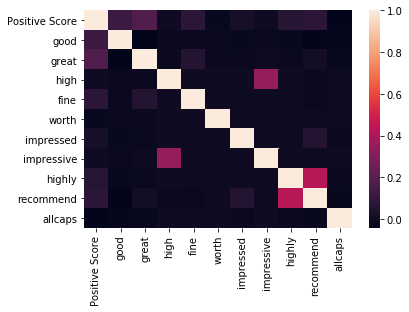

In [29]:
sns.heatmap(data.corr())
plt.show()

The words 'impressive' and 'high' are fairly correlated along with 'highly' and 'recommend'.

In [30]:
dataset = data[keywords + ['allcaps']]
target = data['Positive Score']

In [32]:
bnb = BernoulliNB()
bnb.fit(dataset, target)
y_pred = bnb.predict(dataset)
print("Number of mislabeled points out of a total {} points : {}".format(
    dataset.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 424


With such a high percentage of mislabeled points, replacing some of the redundant and low correlated features might improve the model.

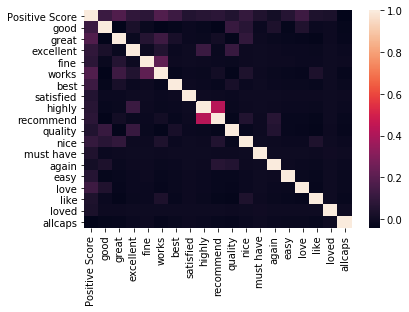

In [87]:
data = pd.read_csv("amazon_cells_labelled.txt",delimiter="\t",names = ['Comment','Positive Score'])
keywords = ['good', 'great', 'excellent', 'fine', 'works', 'best', 'satisfied', 'highly', 'recommend','quality','nice', 'must have', 'again', 'easy', 'love', 'like','loved']

for key in keywords:
    data[str(key)] = data.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data['allcaps'] = data.Comment.str.isupper()
data['Positive Score'] = (data['Positive Score'] == 1)

sns.heatmap(data.corr())
plt.show()

In [80]:
dataset = data[keywords + ['allcaps']]
target = data['Positive Score']

bnb = BernoulliNB()
bnb.fit(dataset, target)
y_pred = bnb.predict(dataset)
print("Number of mislabeled points out of a total {} points : {}".format(
    dataset.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 347


Now to test this model on yelp reviews.

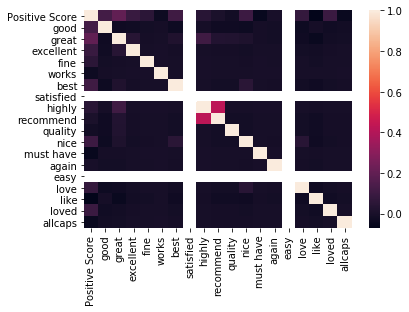

In [81]:
data = pd.read_csv("yelp_labelled.txt",delimiter="\t",names = ['Comment','Positive Score'])
keywords = ['good', 'great', 'excellent', 'fine', 'works', 'best', 'satisfied', 'highly', 'recommend','quality','nice', 'must have', 'again', 'easy', 'love', 'like','loved']

for key in keywords:
    data[str(key)] = data.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data['allcaps'] = data.Comment.str.isupper()
data['Positive Score'] = (data['Positive Score'] == 1)

sns.heatmap(data.corr())
plt.show()

In [82]:
dataset = data[keywords + ['allcaps']]
target = data['Positive Score']

bnb = BernoulliNB()
bnb.fit(dataset, target)
y_pred = bnb.predict(dataset)
print("Number of mislabeled points out of a total {} points : {}".format(
    dataset.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 382


While the initial short list of features for the Amazon data was a great start, I soon realized that the I needed to add more features. The comments for Amazon are quite varied. Also, keywords such as 'good' and 'great' are useful but can bring in false positives. It may be easier to track negative reviews than positive ones since negative reviews seem to be longer. Either way, the final model was able to calculate an error around 33%. When translating this model to yelp, the error increased to about 38%. I feel this is due to the difference in verbage used between customers purchasing an item on Amazon and those at a restaurant.